# pyMatcher Example

From [github](https://github.com/benmiroglio/pymatch)

Required:

    pip install pymatch
    pip install statsmodels
    pip install seaborn

and corrections to code:

    9 from . import functions as uf
    in c:\users\jg114\anaconda3\envs\tf2\lib\site-packages\pymatch\__init__.py

and

    3 from . import functions as uf
    
    517 # return (y == preds).sum() * 1.0 / len(y)
    518 return (y.to_numpy().T == preds).sum() * 1.0 / len(y)
    in c:\users\jg114\anaconda3\envs\tf2\lib\site-packages\pymatch\Matcher.py

In [1]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
path = "D:\\20201007\\pymatch\\misc\\loan.csv"
fields = \
[
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "term",
    "int_rate",
    "installment",
    "grade",
    "sub_grade",
    "loan_status"
]

data = pd.read_csv(path)[fields]

In [3]:
data[:2]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,loan_status
0,16000,16000,16000.0,36 months,18.85,585.29,D,D3,Fully Paid
1,14000,14000,14000.0,36 months,12.42,467.82,B,B4,Fully Paid


In [4]:
test = data[data.loan_status == "Default"]
control = data[data.loan_status == "Fully Paid"]
test['loan_status'] = 1
control['loan_status'] = 0

In [5]:
m = Matcher(test, control, yvar="loan_status", exclude=[])

Formula:
loan_status ~ loan_amnt+funded_amnt+funded_amnt_inv+term+int_rate+installment+grade+sub_grade
n majority: 20000
n minority: 2000


In [6]:
# for reproducibility
np.random.seed(20170925)

m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 65.54%


In [7]:
m.predict_scores()

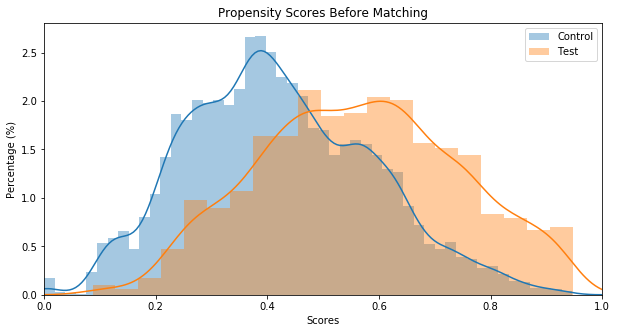

In [8]:
m.plot_scores()

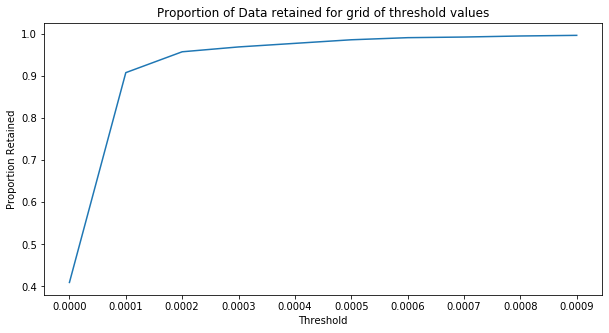

In [9]:
m.tune_threshold(method='random')

In [10]:
m.match(method="min", nmatches=1, threshold=0.0001)

In [11]:
m.record_frequency()

,freq,n_records
0,1,3196
1,2,235
2,3,63
3,4,21
4,5,6
5,6,4
6,7,1


In [12]:
m.assign_weight_vector()

In [13]:
m.matched_data.sort_values("match_id").head(6)

,record_id,weight,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,loan_status,scores,match_id
0,0,1.0,12000,12000,12000.0,60 months,12.59,270.53,C,C2,1,0.547025,0
3331,15254,1.0,12000,12000,12000.0,60 months,13.99,279.16,C,C4,0,0.547031,0
1,1,1.0,15000,15000,15000.0,36 months,10.75,489.31,B,B4,1,0.348774,1
2838,10360,1.0,15000,15000,15000.0,36 months,10.75,489.31,B,B4,0,0.348774,1
2,2,1.0,30000,30000,30000.0,36 months,6.49,919.34,A,A2,1,0.253703,2
2574,7577,1.0,4000,4000,4000.0,36 months,10.15,129.36,B,B2,0,0.253734,2


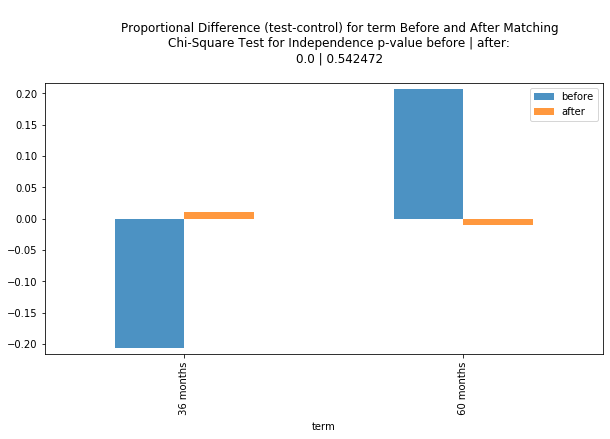

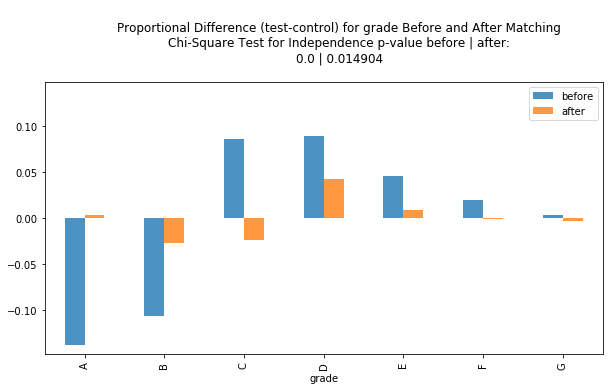

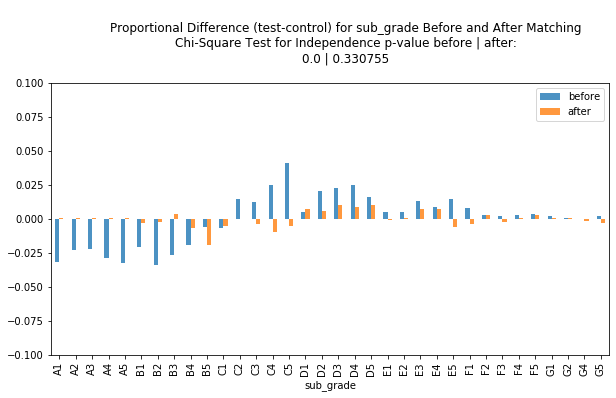

In [14]:
categorical_results = m.compare_categorical(return_table=True)

In [15]:
categorical_results

,var,before,after
0,term,0.0,0.542472
1,grade,0.0,0.014904
2,sub_grade,0.0,0.330755


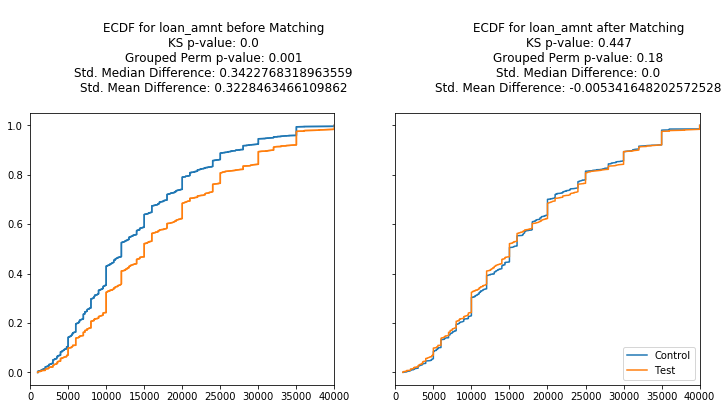

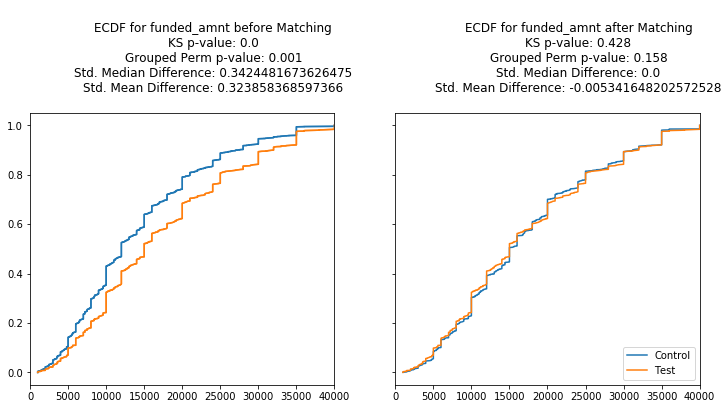

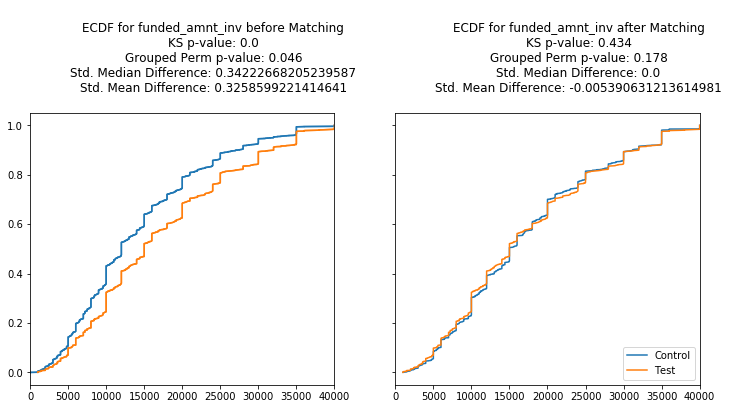

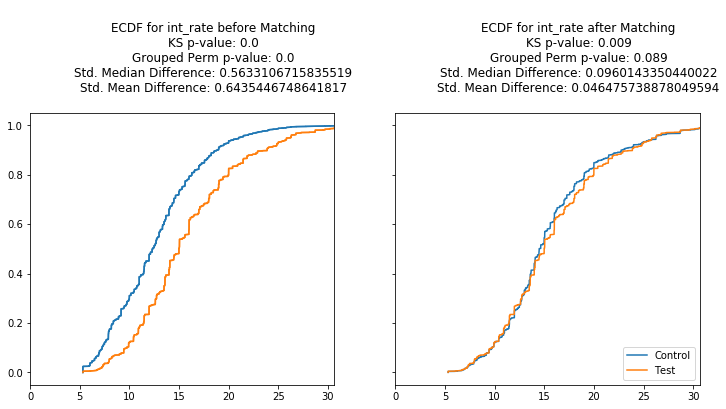

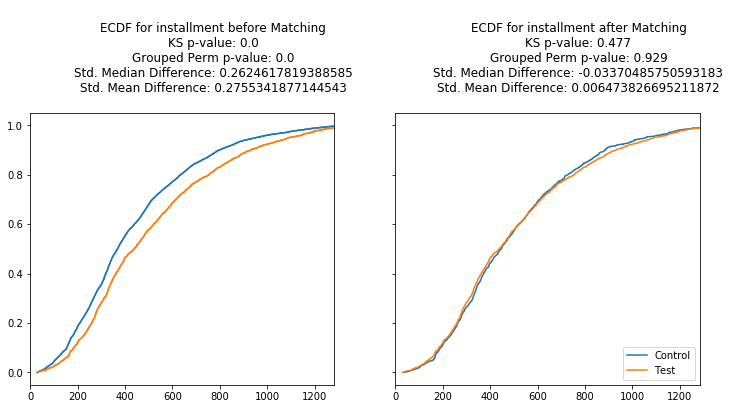

In [16]:
cc = m.compare_continuous(return_table=True)

In [17]:
cc

,var,ks_before,ks_after,grouped_chisqr_before,grouped_chisqr_after,std_median_diff_before,std_median_diff_after,std_mean_diff_before,std_mean_diff_after
0,loan_amnt,0.0,0.447,0.001,0.180,0.342277,0.000000,0.322846,-0.005342
1,funded_amnt,0.0,0.428,0.001,0.158,0.342448,0.000000,0.323858,-0.005342
2,funded_amnt_inv,0.0,0.434,0.046,0.178,0.342227,0.000000,0.325860,-0.005391
3,int_rate,0.0,0.009,0.000,0.089,0.563311,0.096014,0.643545,0.046476
4,installment,0.0,0.477,0.000,0.929,0.262462,-0.033705,0.275534,0.006474
